In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv(r'../data/student-mat.csv',low_memory=False, sep=';')

In [91]:
len(df.columns)

33

In [92]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [93]:
import seaborn as sns
sns.set(style='whitegrid',context='notebook')

In [94]:
columns = []
for name,dtype in zip(df.columns,df.dtypes):
    if dtype == 'int64' or dtype == 'float64':
        columns.append(name)

In [95]:
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale = 1.0)

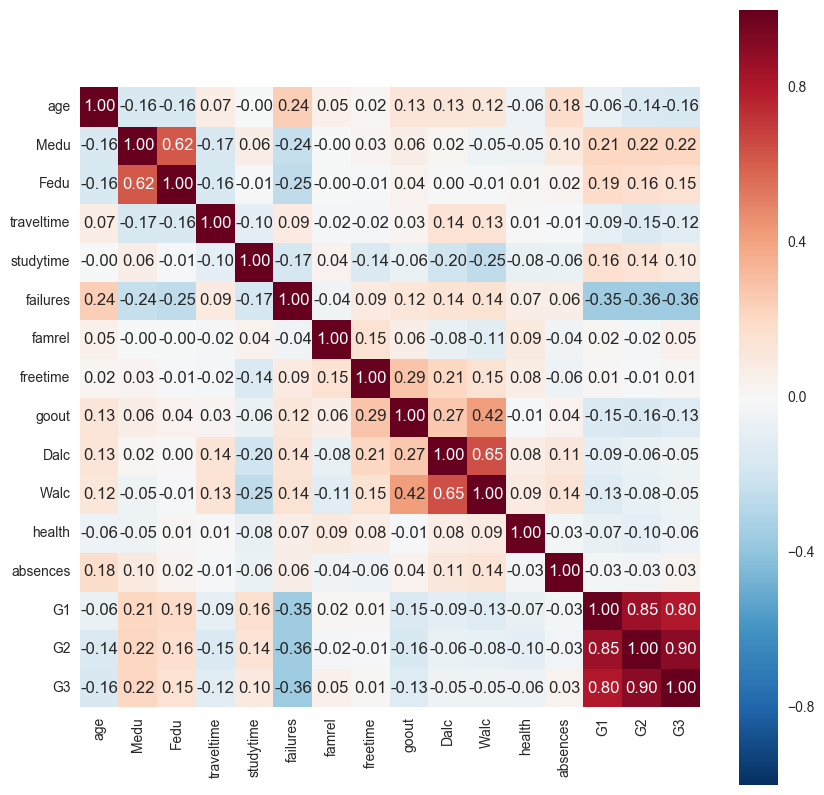

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 12},
                yticklabels = columns,
                xticklabels = columns)

In [97]:
df['Grade'] = df[['G1','G2','G3']].mean(axis=1)

In [98]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [99]:
df.drop(['G1','G2','G3'],axis = 1,inplace=True)

In [100]:
object_columns = []
for name,dtype in zip(df.columns,df.dtypes):
    if dtype == 'object':
        object_columns.append(name) 

In [101]:
object_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [102]:
for column in object_columns:
    print column,df[column].unique()

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


In [103]:
yes_no_columns = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [104]:
for column in yes_no_columns:
    new_name = column + '_num'
    df[new_name] = df[column].map({'yes':1,'no':0})

In [105]:
df.drop(yes_no_columns,axis=1,inplace=True)

In [106]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,Grade,schoolsup_num,famsup_num,paid_num,activities_num,nursery_num,higher_num,internet_num,romantic_num
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5.666667,1,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5.333333,0,1,0,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,8.333333,1,0,1,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,14.666667,0,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,8.666667,0,1,1,0,1,1,0,0


In [107]:
df['school_num'] = df.school.map({'GP':0,'MS':1})
df['sex_num'] = df.sex.map({'M':0,'F':1})
df['address_num'] = df.address.map({'U':0,'R':1})
df['famsize_num'] = df.famsize.map({'LE3':0,'GT3':1})
df['Pstatus_num'] = df.Pstatus.map({'T':0,'A':1})

In [108]:
df.drop(['school','sex','address','famsize','Pstatus'],axis=1,inplace=True)

In [109]:
df.dtypes

age                 int64
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime          int64
studytime           int64
failures            int64
famrel              int64
freetime            int64
goout               int64
Dalc                int64
Walc                int64
health              int64
absences            int64
Grade             float64
schoolsup_num       int64
famsup_num          int64
paid_num            int64
activities_num      int64
nursery_num         int64
higher_num          int64
internet_num        int64
romantic_num        int64
school_num          int64
sex_num             int64
address_num         int64
famsize_num         int64
Pstatus_num         int64
dtype: object

In [110]:
columns = []
for name,dtype in zip(df.columns,df.dtypes):
    if dtype == 'int64' or dtype == 'float64':
        columns.append(name)

In [111]:
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale = 1.0)

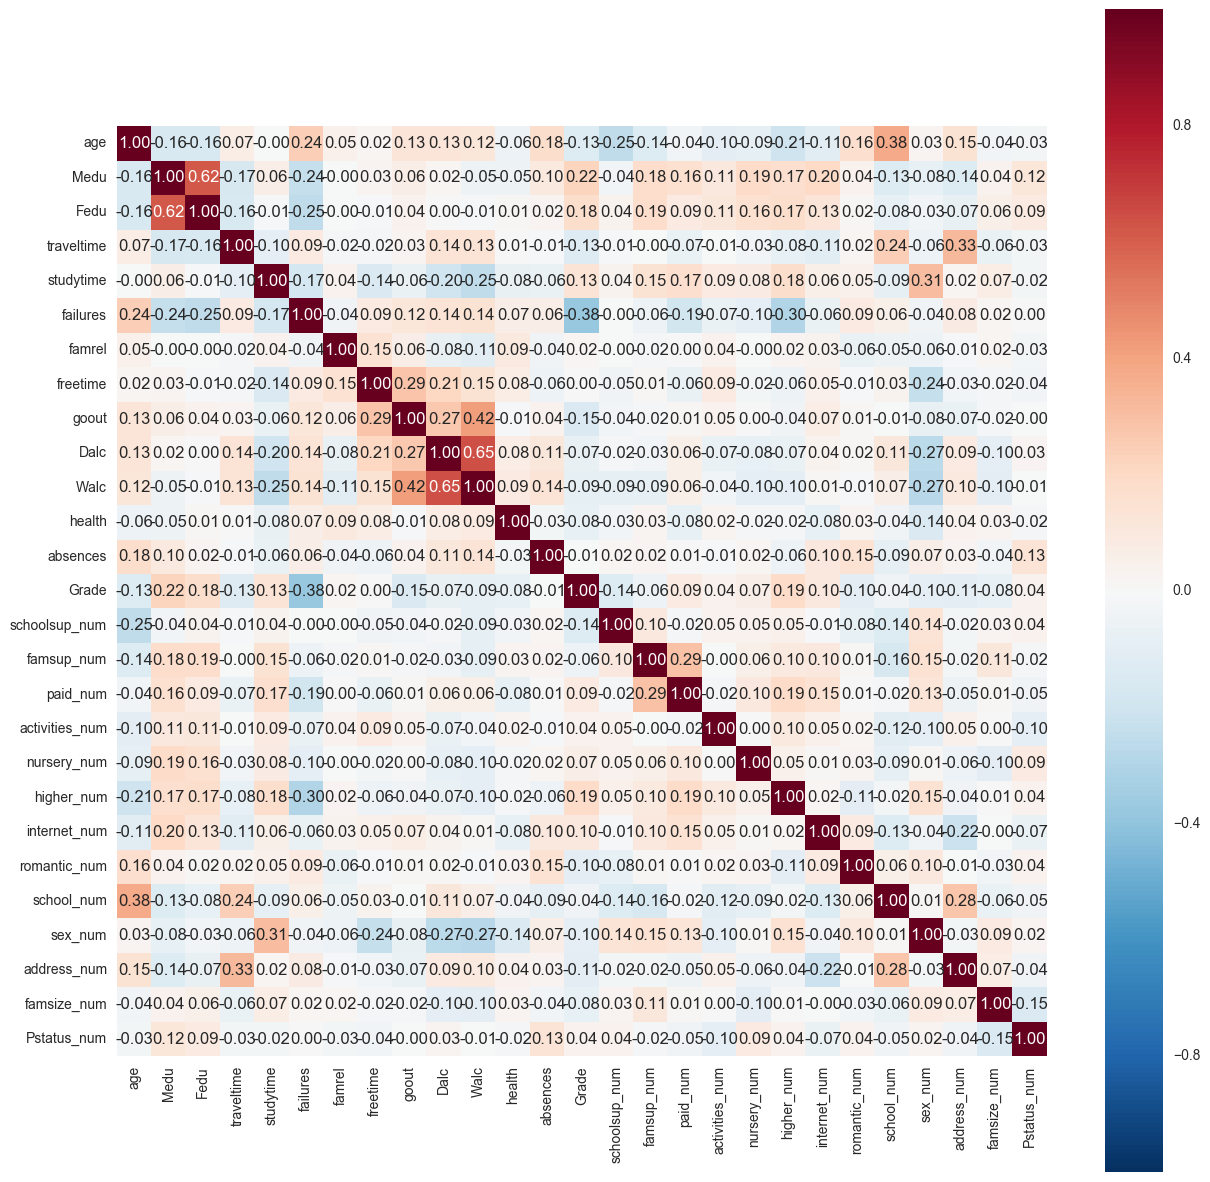

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 12},
                yticklabels = columns,
                xticklabels = columns)

In [69]:
df_dalc = df.drop(['Dalc'],axis=1)
df_walc = df.drop(['Walc'],axis=1)
df_dalc.to_csv('../data/df_dalc.csv',index=False)
df_walc.to_csv('../data/df_walc.csv',index=False)

In [113]:
df_processed = pd.get_dummies(df)

In [76]:
df_processed.to_csv('../data/student_processed.csv',index=False,header=False,columns=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health',
       'absences', 'Grade', 'schoolsup_num', 'famsup_num', 'paid_num',
       'activities_num', 'nursery_num', 'higher_num', 'internet_num',
       'romantic_num', 'school_num', 'sex_num', 'address_num',
       'famsize_num', 'Pstatus_num', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other','Dalc'])

In [73]:
df_processed.columns

Index([u'age', u'Medu', u'Fedu', u'traveltime', u'studytime', u'failures',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'Grade', u'schoolsup_num', u'famsup_num', u'paid_num',
       u'activities_num', u'nursery_num', u'higher_num', u'internet_num',
       u'romantic_num', u'school_num', u'sex_num', u'address_num',
       u'famsize_num', u'Pstatus_num', u'Mjob_at_home', u'Mjob_health',
       u'Mjob_other', u'Mjob_services', u'Mjob_teacher', u'Fjob_at_home',
       u'Fjob_health', u'Fjob_other', u'Fjob_services', u'Fjob_teacher',
       u'reason_course', u'reason_home', u'reason_other', u'reason_reputation',
       u'guardian_father', u'guardian_mother', u'guardian_other'],
      dtype='object')

In [75]:
df_processed.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,1,1,1,2,3,4,3,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df_processed.to_csv('../data/student_processed_dalc.csv',index=False,header=True,columns=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health',
       'absences', 'Grade', 'schoolsup_num', 'famsup_num', 'paid_num',
       'activities_num', 'nursery_num', 'higher_num', 'internet_num',
       'romantic_num', 'school_num', 'sex_num', 'address_num',
       'famsize_num', 'Pstatus_num', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other','Dalc'])

In [114]:
len(df_processed.columns)

44

In [115]:
cm = np.corrcoef(df_processed.values.T)
sns.set(font_scale = 1.0)

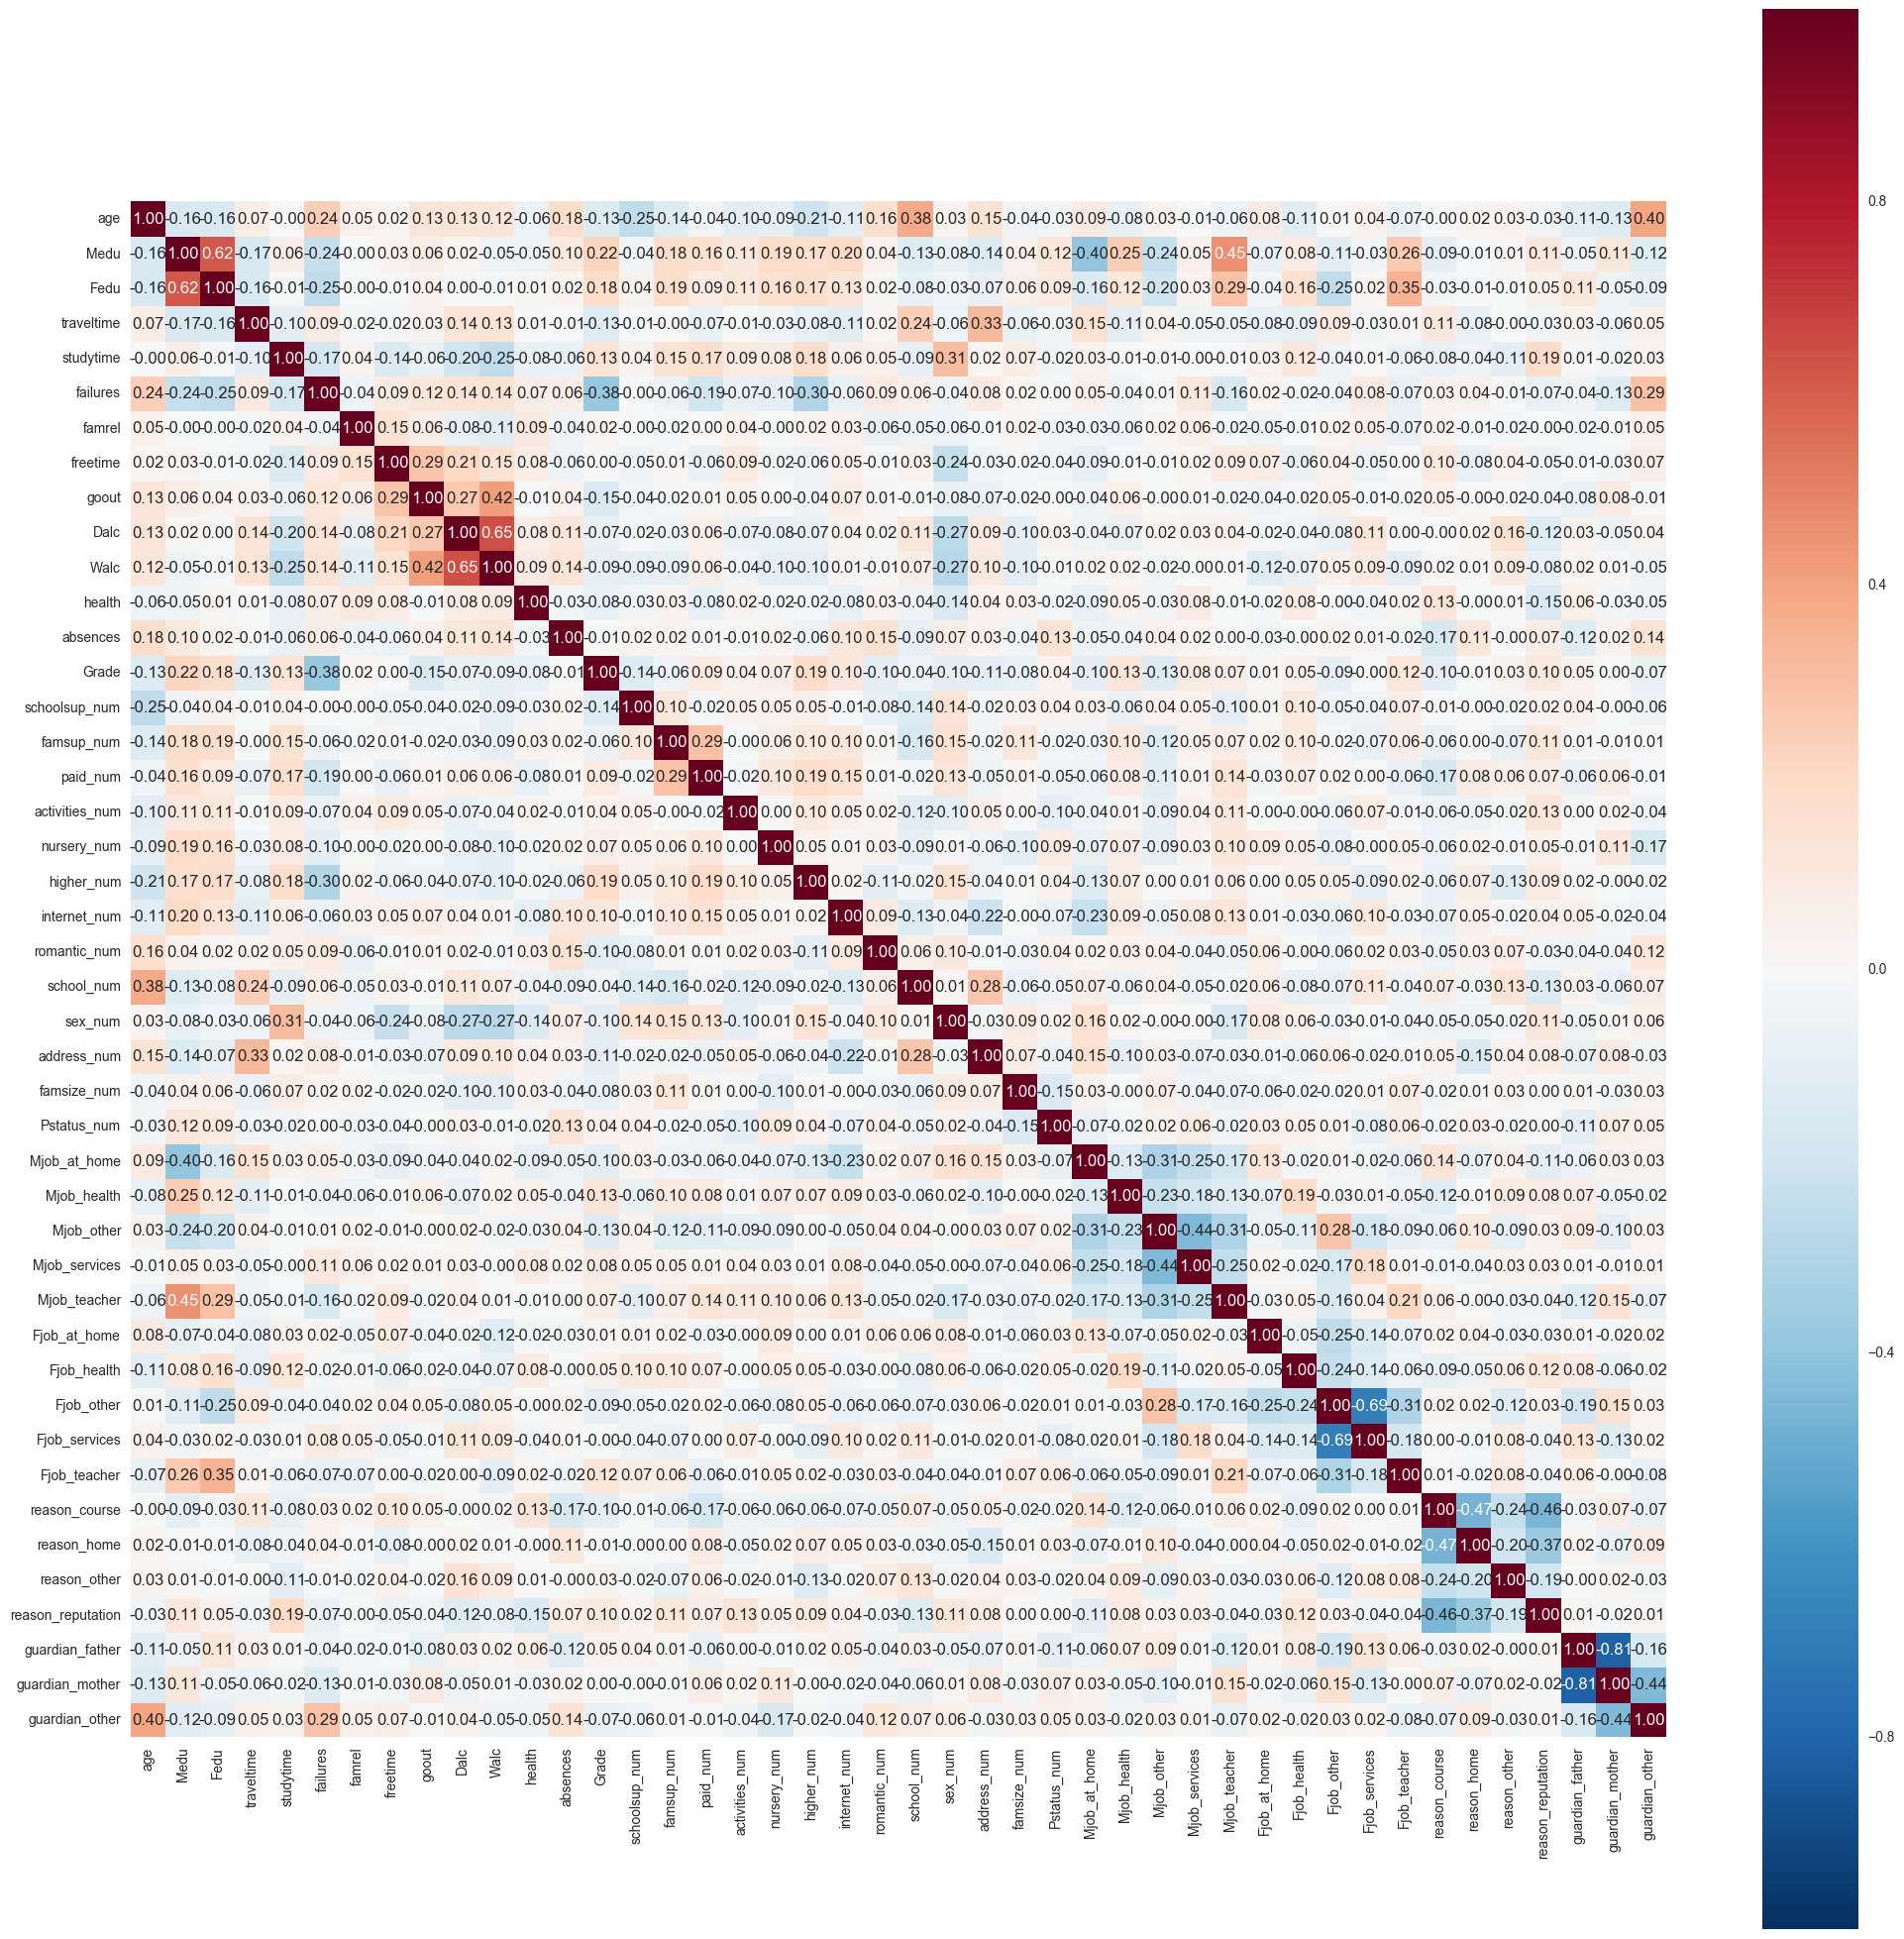

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(25,25)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 12},
                yticklabels = df_processed.columns,
                xticklabels = df_processed.columns)